<a href="https://colab.research.google.com/github/urvashiramdasani/Python/blob/master/18bce247_Practical8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q 8 A : Design a python program which performs the linear regression operation on the given data to predict the house price. Also, visualize the data for different attributes

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mpl_toolkits
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [0]:
data = pd.read_csv("house_price_data.csv")
data.shape

(21613, 21)

In [0]:
# Getting the insights from data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


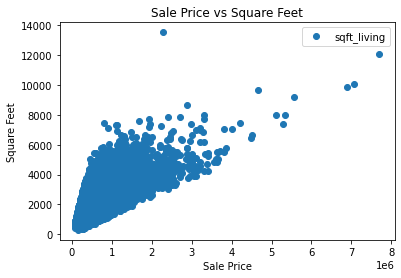

In [0]:
data.plot(x='price', y='sqft_living', style='o')
plt.title('Sale Price vs Square Feet')
plt.xlabel('Sale Price')
plt.ylabel('Square Feet')
plt.show()

# since we got a linear trend for square feet, we will use linear regression for estimating the house 
# price based on square feet. 

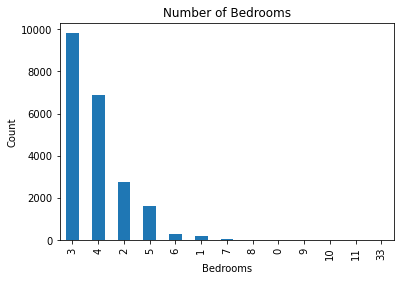

In [0]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Number of Bedrooms')
sns.despine
plt.show()

# We can say here that 3-4 bedrooms per house are highly selling

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

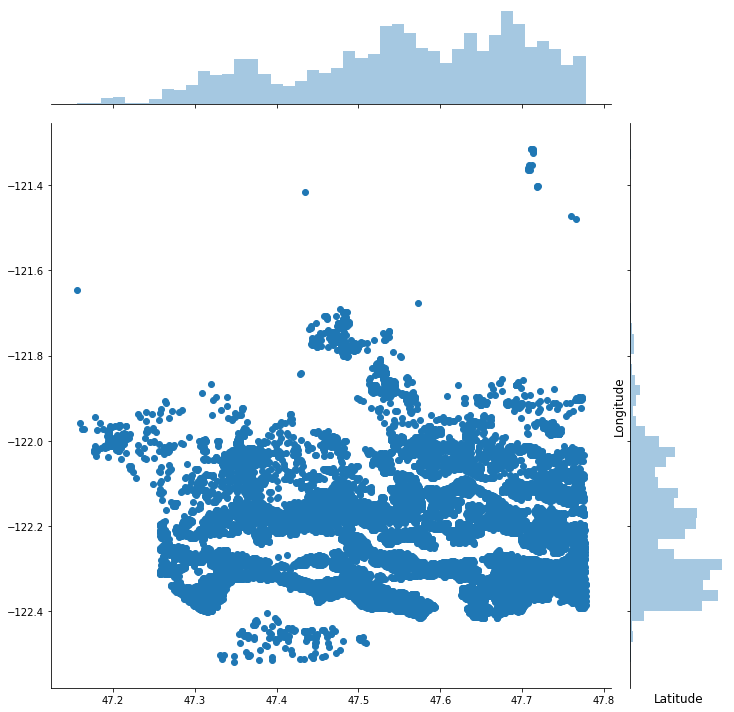

<function seaborn.utils.despine>

In [0]:
plt.figure(figsize=(10, 10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

# we have used joint plot here to look for concentration and placement of data.
# we can see that data is more concentrated between 47.7 to 47.8 latitude,
# and -122.4 to -122.2 longitude

In [0]:
# as we can see, there is no proper factor which can directly affect the house price
# hence we will use linear regression to find out an equation house price as linear 
# combination of all other factors present

x = data[['sqft_living']] # passing as 2-d array else it creates error
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

# here we get our output y=mx+c
c = linear_reg.intercept_
m = linear_reg.coef_
print('m = ',m)
print('c = ',c)

# now we can  predict the house price
price = 283.83658059*1000 + (-50414.32328084612) # for x = 1000
print('Price : ',price)

mse = mean_squared_error(y_test, 283.83658059*(x_test) + (-50414.32328084612))
print('Root Mean Squared Error : ', np.sqrt(mse))

print('Score of linear regression : ',linear_reg.score(x_test, y_test))

# we get very low score for linear regression, this implies that house price 
# is influenced by other factors also, not just sqft_living
# for regressing through multiple factors, we use multiple regression.

m =  [276.62924896]
c =  -35540.4662281503
Price :  233422.25730915385
Root Mean Squared Error :  277671.7986748579
Score of linear regression :  0.4977644742468299


Q 8 B : Design a python program which implements the bisection and false positioning method

In [3]:
# Bisection method - used to find the root of an equation in a given interval

# defining function
f = lambda x: x*x*x - x*x + 2

# intervals should be chosen such that f(a)*f(b)<0 i.e, they should have opposite signs
a = -200 # defining the interval
b = 300

mid = 0

# defining some tolerance value between a and b
while((b-a) >= 0.01):
  mid = (a+b)/2

  if f(mid) == 0.0:
    break
  if f(a)*f(mid)<0:
    b = mid
  else:
    a = mid
print('Root of the equation x^3 - x^2 + 2 is ',mid)

Root of the equation x^3 - x^2 + 2 is  -1.00250244140625


In [1]:
# False positoning method - similar to bisection just we draw a chord and find a point where chord cuts x axis

# defining function and intervals
f = lambda x: x*x*x - x*x + 2
a = -200
b = 300

# defining a very large range
for i in range(1000000):
  mid = (a*f(b) - b*f(a))/(f(b) - f(a))

  if f(mid) == 0.0:
    break
  if f(a)*f(mid)<0:
    b = mid
  else:
    a = mid

print('Root of the equation x^3 - x^2 + 2 is ',mid)

Root of the equation x^3 - x^2 + 2 is  -1.0000000000037252


Q 8 C : Design a python program that generates the 100 random variables and finds out the mean, median and mode for the same

In [7]:
import numpy as np
from scipy import stats

nums = np.random.randint(50, size = 100)
mean = np.mean(nums)
median = np.median(nums)
mode = stats.mode(nums)

print('The mean, median and mode for nums is ', mean, median, mode)

The mean, median and mode for nums is  23.47 24.0 ModeResult(mode=array([7]), count=array([5]))
